In [22]:
import pandas as pd

In [23]:
dir = "dst_train/20251031_134352/"

result_df = pd.read_csv(dir + "metrics.csv")

In [24]:
import matplotlib.pyplot as plt


def moving_average(data, col, window_size=1000):
    return data[col].rolling(window=window_size).mean()


def moving_std(data, col, window_size=1000):
    return data[col].rolling(window=window_size).std()


def plot_metric_with_moving_average(data_list: list, col, window_size=1000):
    plt.figure(figsize=(10, 6))
    for data in data_list:
        plt.plot(
            moving_average(data, col, window_size),
            label=f"Window Size: ({window_size})",
        )
        plt.fill_between(
            data.index,
            moving_average(data, col, window_size) - moving_std(data, col, window_size),
            moving_average(data, col, window_size) + moving_std(data, col, window_size),
            alpha=0.2,
        )
    plt.title(f"{col} with Moving Average")
    plt.xlabel("Episode")
    plt.ylabel(col)
    plt.legend()
    plt.grid()
    plt.show()

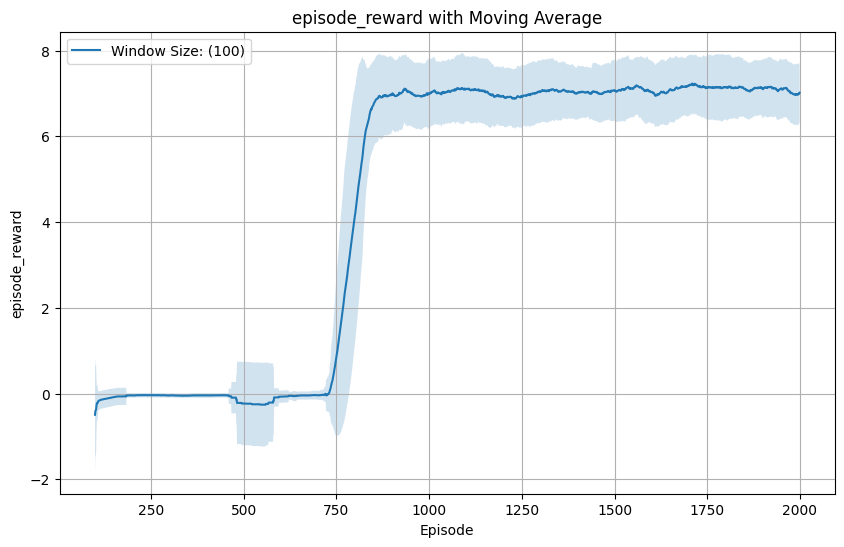

In [25]:
plot_metric_with_moving_average([result_df], "episode_reward", window_size=100)

/tmp/ipykernel_1521905/1555860337.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


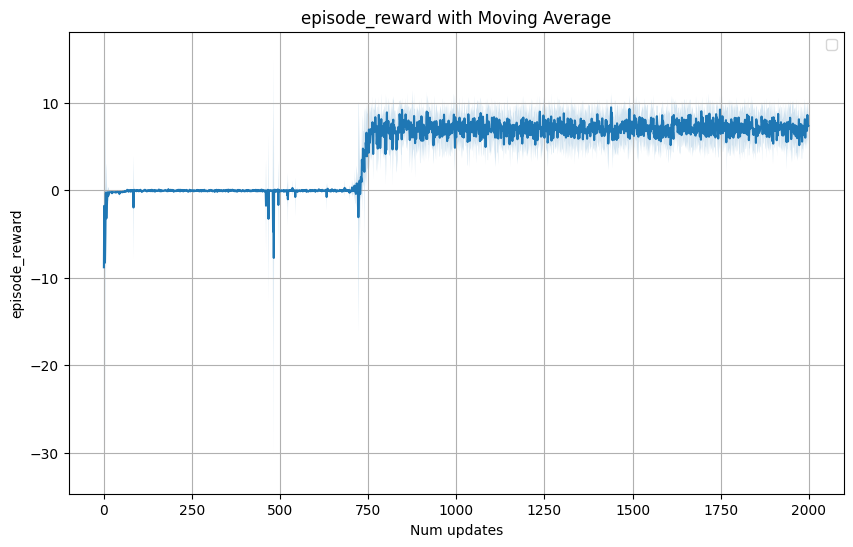

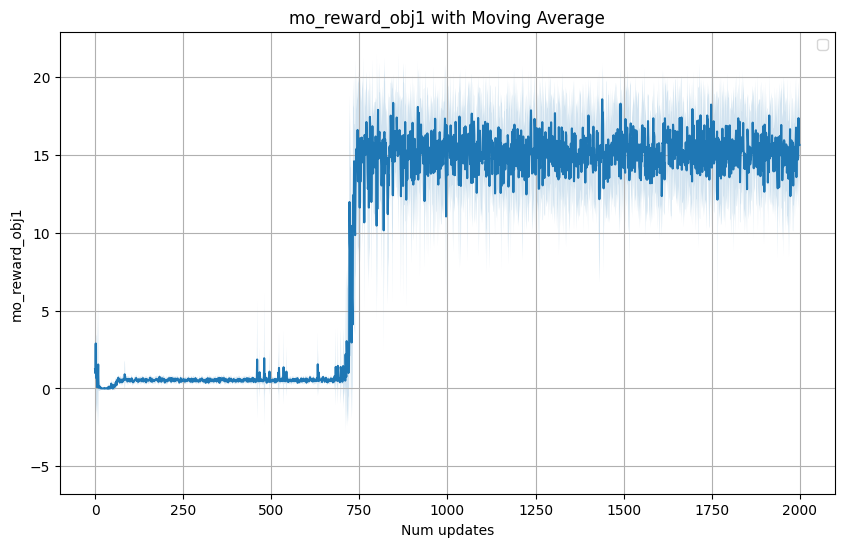

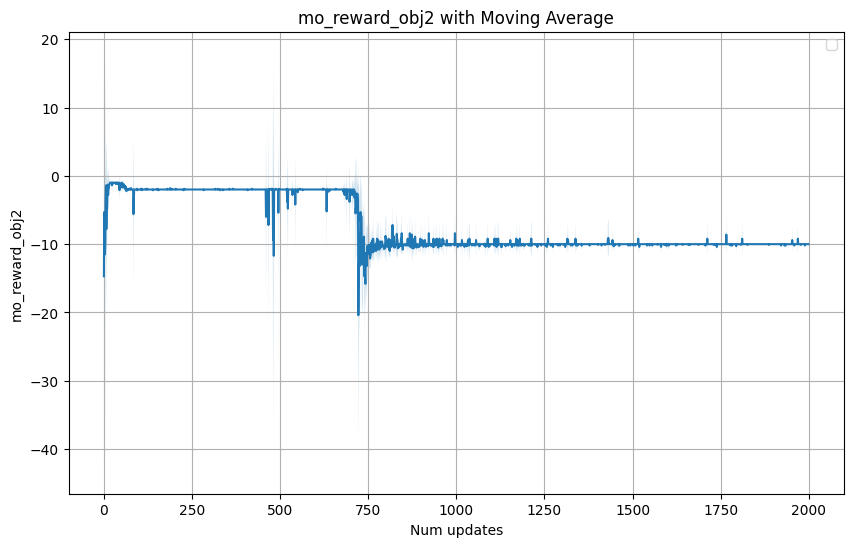

In [26]:
metrics = ["episode_reward", "mo_reward_obj1", "mo_reward_obj2"]

for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.plot(result_df[metric])
    plt.fill_between(
        result_df.index,
        result_df[metric] - result_df[f"{metric}_std"],
        result_df[metric] + result_df[f"{metric}_std"],
        alpha=0.2,
    )
    plt.title(f"{metric} with Moving Average")
    plt.xlabel("Num updates")
    plt.ylabel(metric)
    plt.legend()
    plt.grid()
    plt.show()

# IQL

In [27]:
df1 = pd.read_csv("moiql_results/20251106_093931/train_metrics.csv")
df2 = pd.read_csv("moiql_results/20251106_093955/train_metrics.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'moiql_results/20251106_093931/train_metrics.csv'

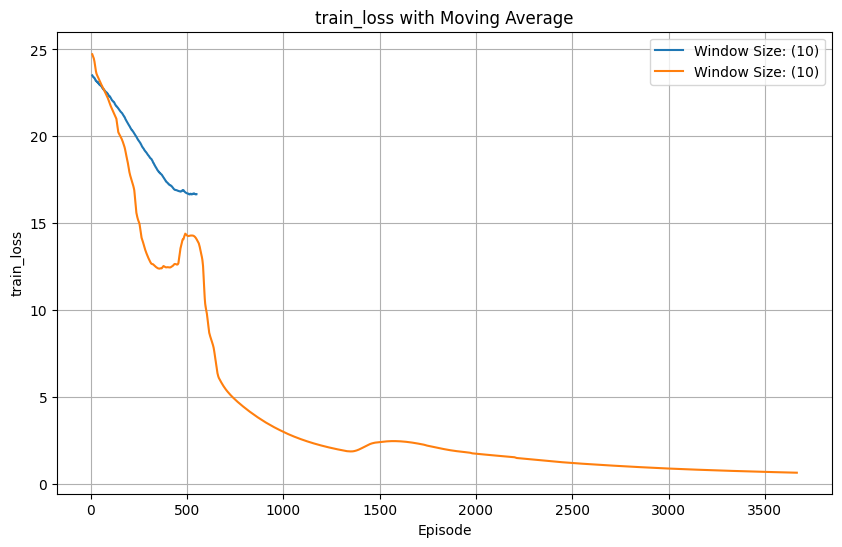

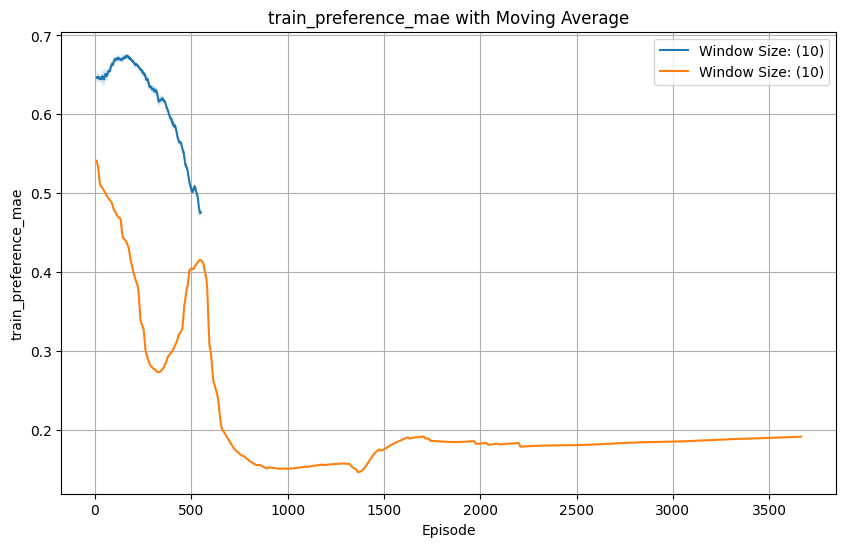

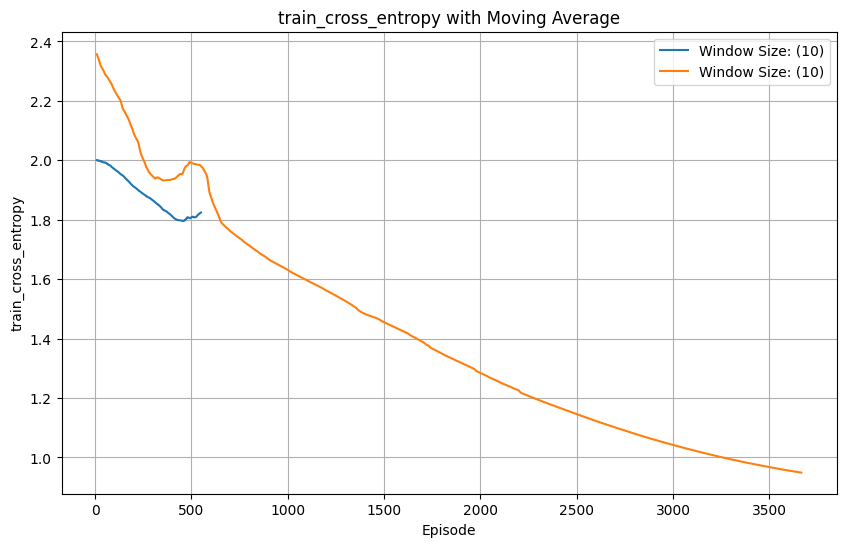

In [ ]:
plot_metric_with_moving_average([df1, df2], "train_loss", window_size=10)
plot_metric_with_moving_average([df1, df2], "train_preference_mae", window_size=10)
plot_metric_with_moving_average([df1, df2], "train_cross_entropy", window_size=10)